In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
full_data = pd.read_csv("./heart.csv")

In [38]:
print(full_data.head(3))
print("\n数据数量: %d \n特征值数量: %d" % (full_data.shape[0], full_data.shape[1]))
print("特征值名称: ", list(full_data.columns))

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  

数据数量: 303 
特征值数量: 14
特征值名称:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [39]:
#使用describe函数统计来数据
full_data.describe().T.style.bar(subset=['mean'], color='#208ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


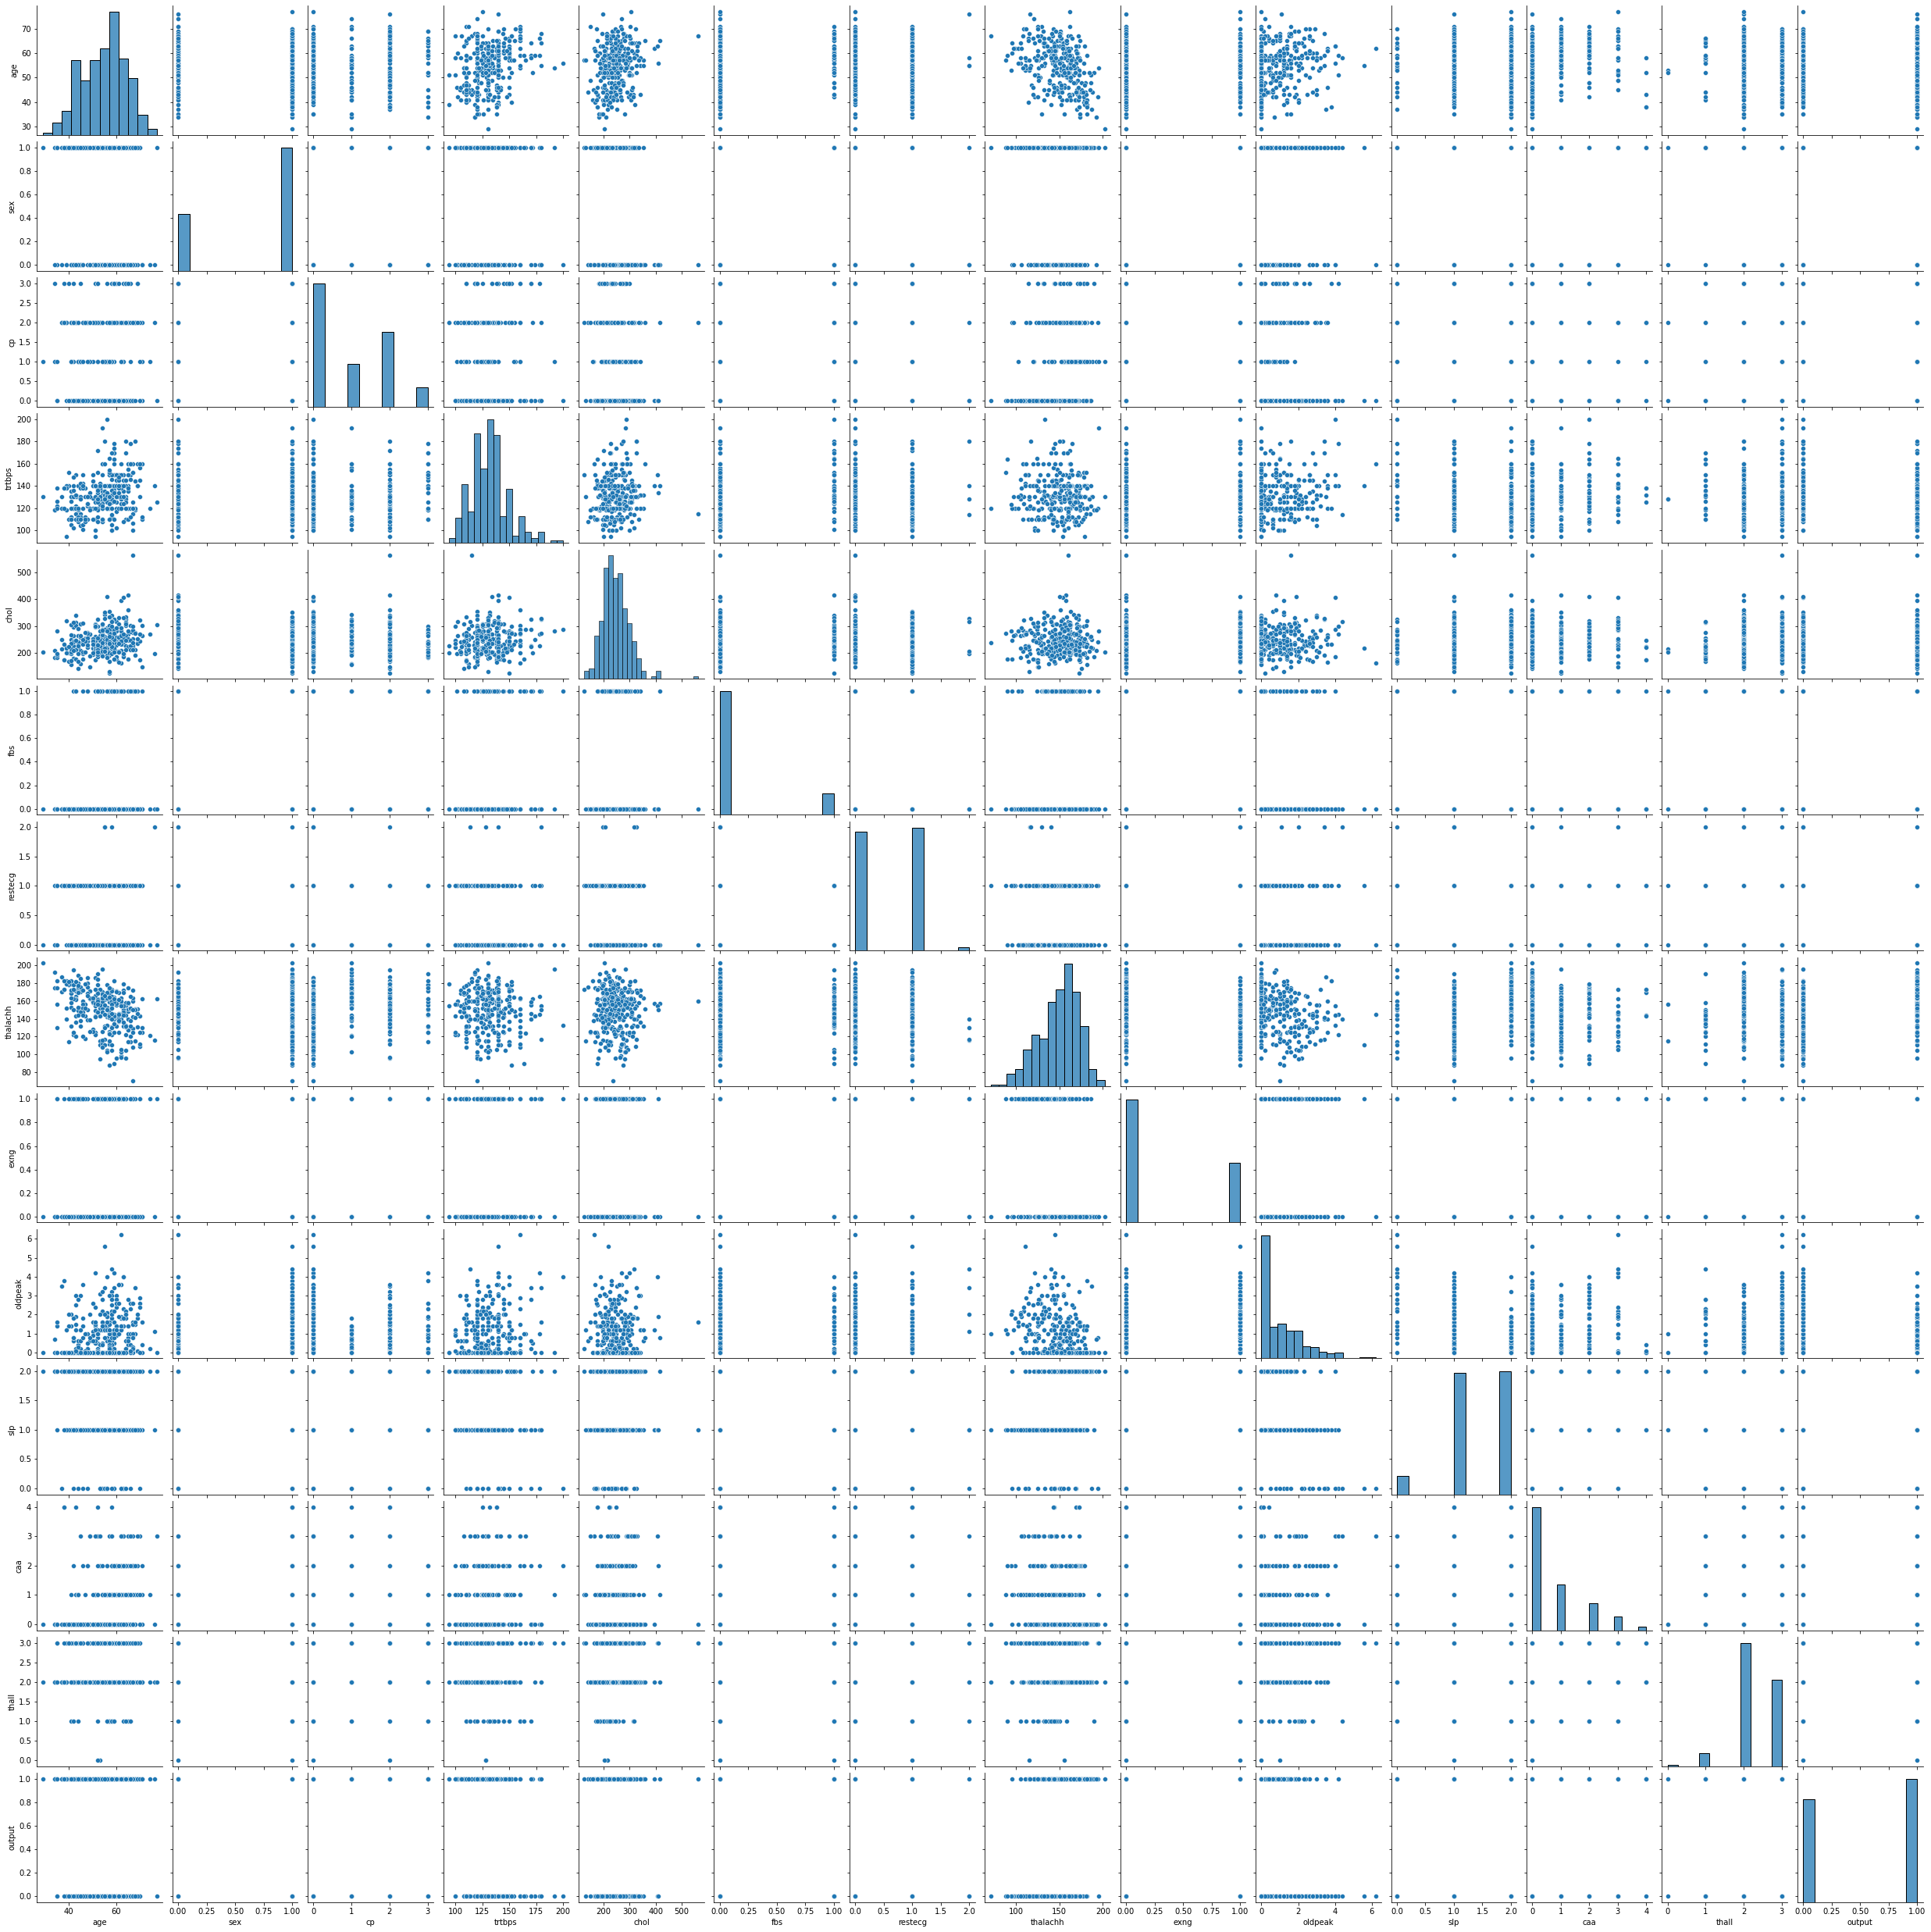

In [40]:
import seaborn as sns
sns.pairplot(full_data)

   Count  Percentage
1    165       54.46
0    138       45.54


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


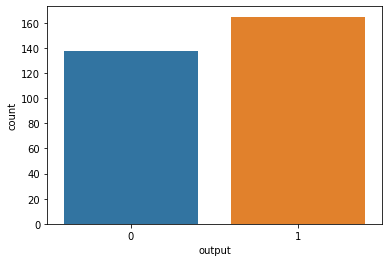

In [41]:
sns.countplot(full_data['output'])#将心脏病结果可视化
print(pd.concat( [full_data['output'].value_counts(),
                  full_data['output'].value_counts(normalize=True).mul(100).round(2)],
                 axis = 1,
                 keys = ('Count', 'Percentage')))

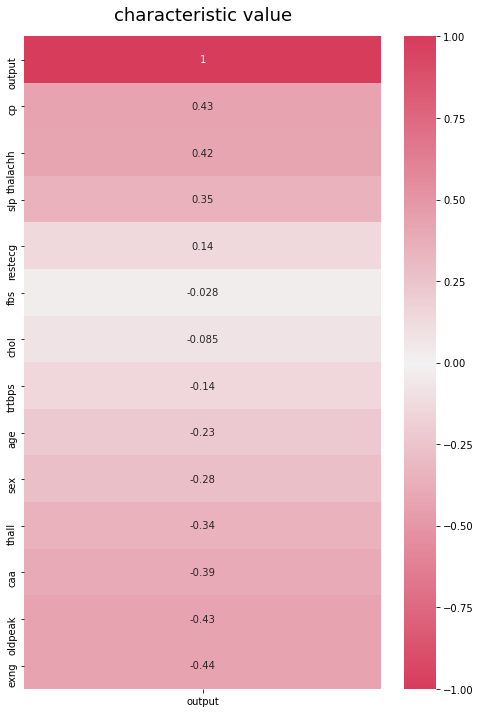

In [42]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(full_data.corr()[['output']].sort_values(by='output', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap=sns.diverging_palette(5, 5, as_cmap=True))
heatmap.set_title('characteristic value', fontdict={'fontsize':18}, pad=16);

In [43]:
low_corr_vars = ['restecg', 'fbs', 'chol', 'trtbps']
full_data.drop(low_corr_vars, axis = 1, inplace = True)
full_data.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [44]:
full_data =pd.get_dummies(full_data, columns = ['cp', 'caa', 'thall'], drop_first = True)
full_data.head()

,age,sex,thalachh,exng,oldpeak,slp,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,150,0,2.3,0,1,0,0,1,0,0,0,0,1,0,0
1,37,1,187,0,3.5,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,172,0,1.4,2,1,1,0,0,0,0,0,0,0,1,0
3,56,1,178,0,0.8,2,1,1,0,0,0,0,0,0,0,1,0
4,57,0,163,1,0.6,2,1,0,0,0,0,0,0,0,0,1,0


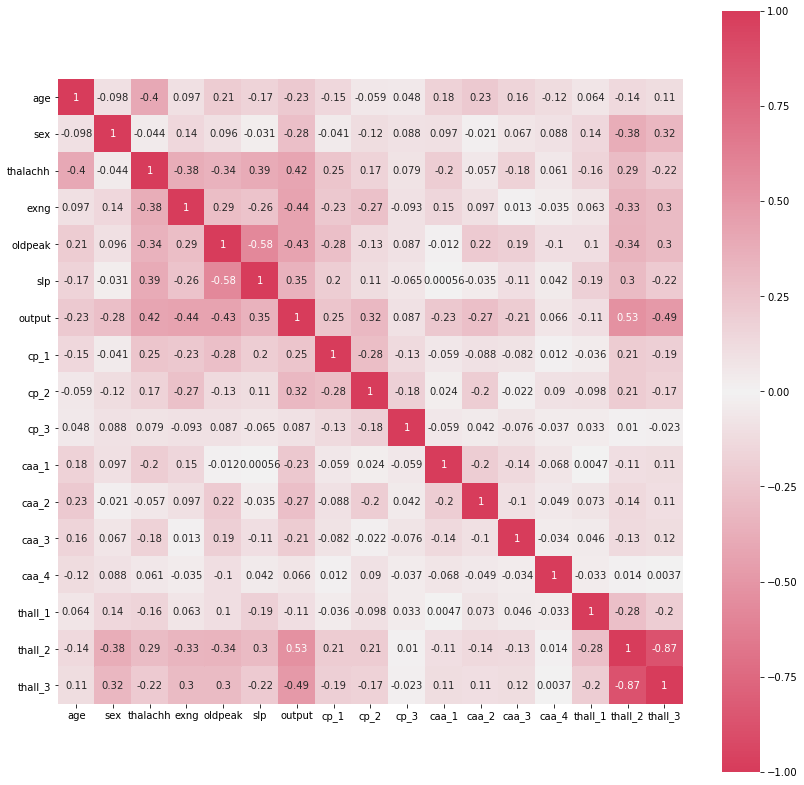

In [45]:
#corr_data = full_data.drop(['output'], axis = 1)
corrmat = full_data.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, 
            vmin = -1, 
            vmax= 1, 
            square = True, 
            annot = True,
            cmap=sns.diverging_palette(5, 5, as_cmap=True));

In [46]:
full_data = full_data.drop(['slp'], axis = 1)
full_data.head()

,age,sex,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,150,0,2.3,1,0,0,1,0,0,0,0,1,0,0
1,37,1,187,0,3.5,1,0,1,0,0,0,0,0,0,1,0
2,41,0,172,0,1.4,1,1,0,0,0,0,0,0,0,1,0
3,56,1,178,0,0.8,1,1,0,0,0,0,0,0,0,1,0
4,57,0,163,1,0.6,1,0,0,0,0,0,0,0,0,1,0


In [47]:
# 分成预测变量和目标变量
x_full = full_data.drop('output', axis = 1)
y_full = full_data['output']

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size = 0.3, random_state = 1)

print('Train data records: %d \nTest data records: %d' % (x_train.shape[0], x_test.shape[0]))

Train data records: 212 
Test data records: 91


                 Model  Train_Accuracy  Test_Accuracy
0  Logistic Regression           86.79          81.32


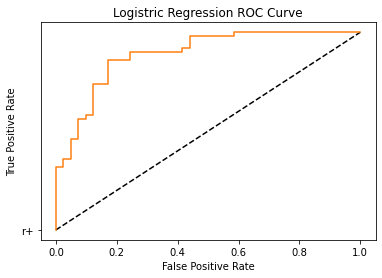

In [48]:
logistic_model =LogisticRegression(max_iter = 1000)
logistic_model.fit(x_train, y_train)
train_predictions = logistic_model.predict(x_train)
test_predictions = logistic_model.predict(x_test)
model_performance = pd.DataFrame([[ 'Logistic Regression', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy'])
print(model_performance)

# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,logistic_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()                                        

In [49]:
# Creating a function to create different models based on values of max_leaf_nodes
def dt_score(max_leaf_nodes, x_train, y_train, x_test, y_test):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(x_train, y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    ac_score_train = round(accuracy_score(y_train, train_predict)*100,2)
    ac_score_test = round(accuracy_score(y_test, test_predict)*100,2)
    return(ac_score_train, ac_score_test)

dt_score_results = pd.DataFrame(columns = ['Max_leaf_nodes', 'Train Accuracy', 'Test Accuracy'])
for max_leaf_nodes in [2, 3, 4, 5, 10, 20, 30, 40, 50]:
    ac_score_train, ac_score_test = dt_score(max_leaf_nodes, x_train, y_train, x_test, y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, ac_score_train, ac_score_test))   

Max leaf nodes: 2  	 Train Accuracy:  75.00 	 Test Accuracy 80.22
Max leaf nodes: 3  	 Train Accuracy:  77.83 	 Test Accuracy 72.53
Max leaf nodes: 4  	 Train Accuracy:  78.77 	 Test Accuracy 70.33
Max leaf nodes: 5  	 Train Accuracy:  80.66 	 Test Accuracy 69.23
Max leaf nodes: 10  	 Train Accuracy:  85.38 	 Test Accuracy 68.13
Max leaf nodes: 20  	 Train Accuracy:  93.40 	 Test Accuracy 71.43
Max leaf nodes: 30  	 Train Accuracy:  97.17 	 Test Accuracy 69.23
Max leaf nodes: 40  	 Train Accuracy:  100.00 	 Test Accuracy 68.13
Max leaf nodes: 50  	 Train Accuracy:  100.00 	 Test Accuracy 68.13


In [52]:
decision_tree_model = DecisionTreeClassifier(max_leaf_nodes = 2, random_state = 1)
decision_tree_model.fit(x_train,y_train)
train_predictions = decision_tree_model.predict(x_train)
test_predictions = decision_tree_model.predict(x_test)
model_performance = model_performance.append(pd.DataFrame([[ 'Decison Tree Classifier', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy']), ignore_index = True)
print(model_performance)
# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,decision_tree_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Decison Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

                     Model  Train_Accuracy  Test_Accuracy
0      Logistic Regression           86.79          81.32
1  Decison Tree Classifier           75.00          80.22
2  Decison Tree Classifier           75.00          80.22


In [51]:
# Creating a function to create different models based on values of max_leaf_nodes
def rf_score(max_leaf_nodes, x_train, y_train, x_test, y_test):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(x_train, y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    ac_score_train = round(accuracy_score(y_train, train_predict)*100,2)
    ac_score_test = round(accuracy_score(y_test, test_predict)*100,2)
    return(ac_score_train, ac_score_test)

rf_score_results = pd.DataFrame(columns = ['Max_leaf_nodes', 'Train Accuracy', 'Test Accuracy'])
for max_leaf_nodes in [2, 3, 4, 5, 10, 20, 30, 40, 50]:
    ac_score_train, ac_score_test = rf_score(max_leaf_nodes, x_train, y_train, x_test, y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, ac_score_train, ac_score_test))   

Max leaf nodes: 2  	 Train Accuracy:  80.66 	 Test Accuracy 80.22
Max leaf nodes: 3  	 Train Accuracy:  83.02 	 Test Accuracy 81.32
Max leaf nodes: 4  	 Train Accuracy:  83.96 	 Test Accuracy 82.42
Max leaf nodes: 5  	 Train Accuracy:  83.49 	 Test Accuracy 83.52
Max leaf nodes: 10  	 Train Accuracy:  88.21 	 Test Accuracy 78.02
Max leaf nodes: 20  	 Train Accuracy:  96.23 	 Test Accuracy 78.02
Max leaf nodes: 30  	 Train Accuracy:  99.06 	 Test Accuracy 75.82
Max leaf nodes: 40  	 Train Accuracy:  99.53 	 Test Accuracy 75.82
Max leaf nodes: 50  	 Train Accuracy:  100.00 	 Test Accuracy 75.82


In [56]:
random_forest_model = RandomForestClassifier(max_leaf_nodes = 5, random_state = 1)
random_forest_model.fit(x_train,y_train)
train_predictions = random_forest_model.predict(x_train)
test_predictions = random_forest_model.predict(x_test)
model_performance = model_performance.append(pd.DataFrame([[ 'Random Forest Classifier', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy']), ignore_index = True)
print(model_performance)
# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,random_forest_model.predict_proba(x_test)[:,1])

                      Model  Train_Accuracy  Test_Accuracy
0       Logistic Regression           86.79          81.32
1   Decison Tree Classifier           75.00          80.22
2   Decison Tree Classifier           75.00          80.22
3  Random Forest Classifier           83.49          83.52
4  Random Forest Classifier           83.49          83.52
5  Random Forest Classifier           83.49          83.52
6  Random Forest Classifier           83.49          83.52


In [58]:
full_predictions = random_forest_model.predict(x_full)
print( "Accuracy Score: %.2f " % (round(accuracy_score(y_full, full_predictions)*100,2)))

Accuracy Score: 83.50 
